In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
df=pd.read_csv("/kaggle/input/housedata/output.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.shape

(4600, 18)

In [4]:
# to see sum of all null values in our dataframe
df.isnull().sum().sum()

0

In [5]:
# to see datatype of each feature and there datatype also
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
# see low and high cardinalty catgoric features 
df.select_dtypes("object").nunique()

date          70
street      4525
city          44
statezip      77
country        1
dtype: int64

as we see street , date and statezip  has high cardinalty and country has low cardinalty 
and we will drop them 

In [8]:
df.drop(columns=['statezip','country',"date","street"],inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

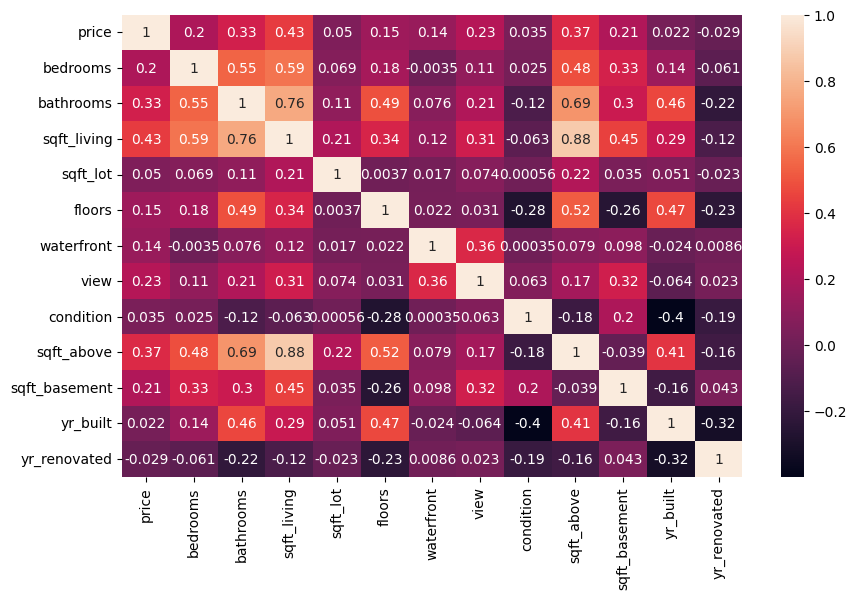

In [11]:
x=df.select_dtypes("number")
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(),annot=True);

In [12]:
# lets see corr between featurs to see multicollinarty 
correlation_matrix = df.select_dtypes("number").drop(columns=['price']).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.6) & (correlation_matrix !=1.0)]
high_corr = high_corr.stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr = high_corr.dropna()
high_corr 


,Variable 1,Variable 2,Correlation
0,bathrooms,sqft_living,0.760952
1,bathrooms,sqft_above,0.689918
2,sqft_living,bathrooms,0.760952
3,sqft_living,sqft_above,0.876592
4,sqft_above,bathrooms,0.689918
5,sqft_above,sqft_living,0.876592


as we see there is high corr between bathrooms and sqft_living , sqft_living and sqft_above 
we will drop two of sqft_living or bathrooms or sqft_above depend on there corr with our target price 

In [13]:
# see multicollinarty feature there corr with our target price 
df[["sqft_above","sqft_living","bathrooms","price"]].corr()

,sqft_above,sqft_living,bathrooms,price
sqft_above,1.000000,0.876592,0.689918,0.367570
sqft_living,0.876592,1.000000,0.760952,0.430322
bathrooms,0.689918,0.760952,1.000000,0.327110
price,0.367570,0.430322,0.327110,1.000000


we will drop bathrooms and sqft_above as they have least corr 

In [14]:
df.drop(columns=["sqft_above","bathrooms"],inplace=True)

In [15]:
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1340,7912,1.5,0,0,3,0,1955,2005,Shoreline
1,2384000.0,5.0,3650,9050,2.0,0,4,5,280,1921,0,Seattle
2,342000.0,3.0,1930,11947,1.0,0,0,4,0,1966,0,Kent
3,420000.0,3.0,2000,8030,1.0,0,0,4,1000,1963,0,Bellevue
4,550000.0,4.0,1940,10500,1.0,0,0,4,800,1976,1992,Redmond


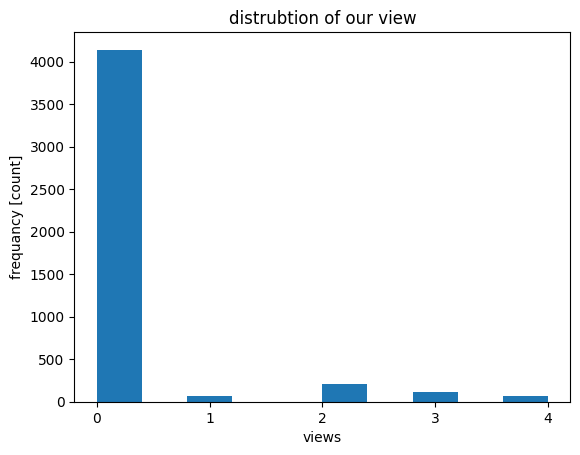

In [16]:
df['view'].value_counts()
df['view'].plot(kind="hist")
plt.xticks([0,1,2,3,4])
plt.xlabel("views")
plt.ylabel("frequancy [count]")
plt.title("distrubtion of our view");

most of people are on view "0"

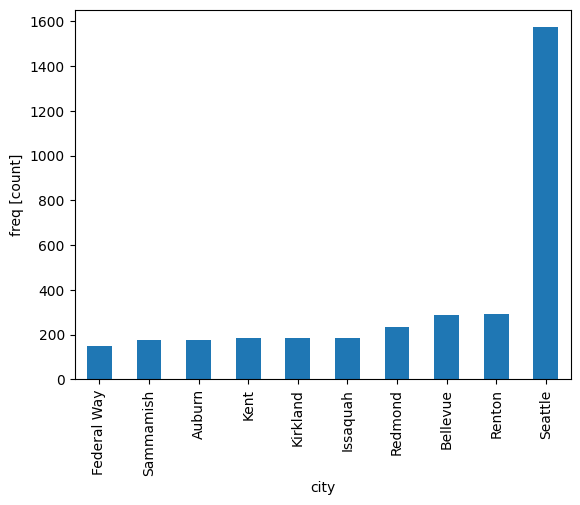

In [17]:
df['city'].value_counts().sort_values().tail(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("freq [count]");

most of houses from seattle

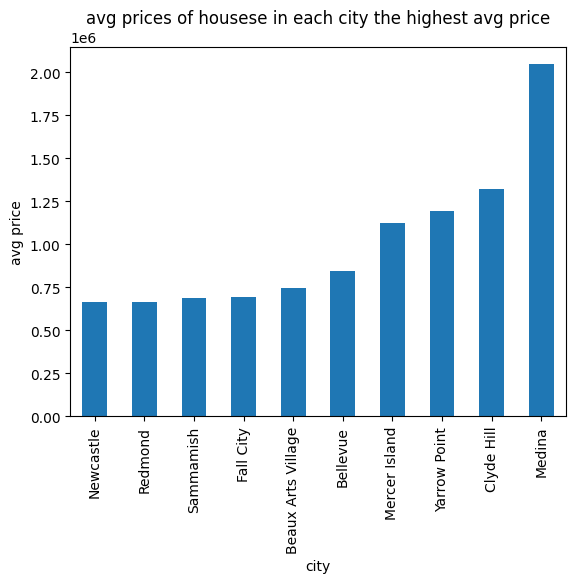

In [18]:
df.groupby('city')['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("avg price")
plt.title("avg prices of housese in each city the highest avg price");

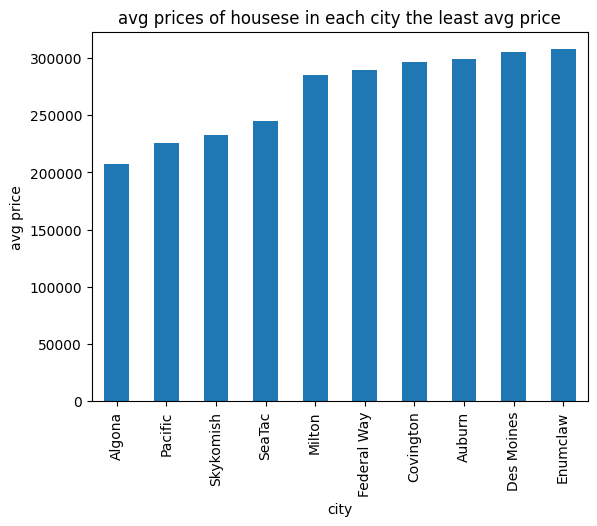

In [19]:
df.groupby('city')['price'].mean().sort_values().head(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("avg price")
plt.title("avg prices of housese in each city the least avg price");

as we see range of prices are very differnt

In [20]:
df.drop(columns=['floors',"waterfront",'condition'],inplace=True)
df.head()

,price,bedrooms,sqft_living,sqft_lot,view,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1340,7912,0,0,1955,2005,Shoreline
1,2384000.0,5.0,3650,9050,4,280,1921,0,Seattle
2,342000.0,3.0,1930,11947,0,0,1966,0,Kent
3,420000.0,3.0,2000,8030,0,1000,1963,0,Bellevue
4,550000.0,4.0,1940,10500,0,800,1976,1992,Redmond


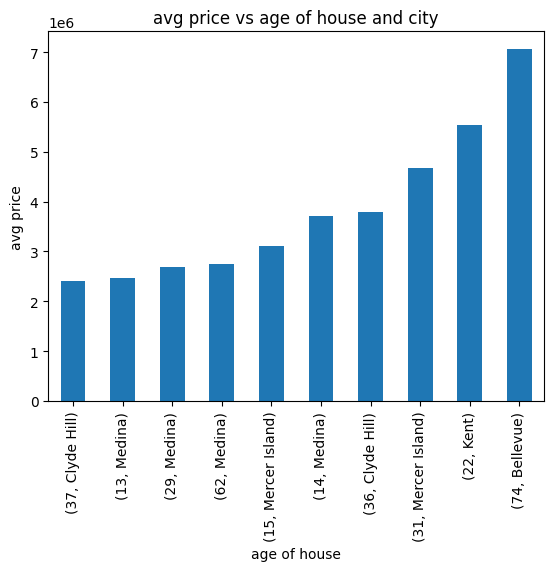

In [21]:
# this data was collected at 2014 so we will create column age which is diff between yr_bulit and 2014
df['n_years']=2014-df['yr_built']
df.groupby(['n_years','city'])['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs age of house and city");

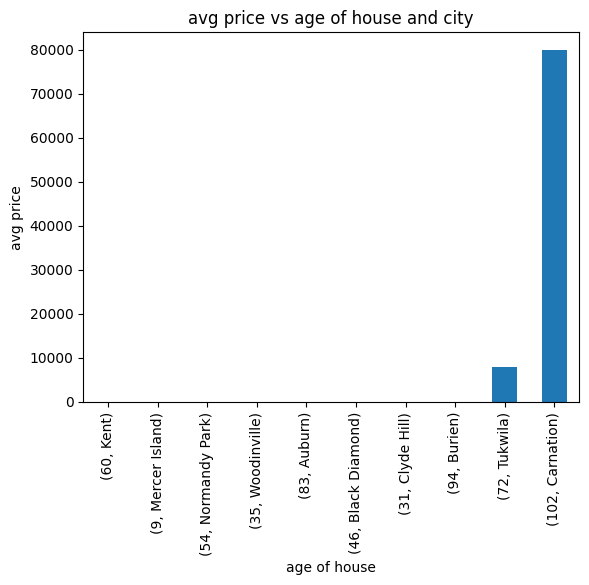

In [22]:
df['n_years']=2014-df['yr_built']
df.groupby(['n_years','city'])['price'].mean().sort_values().head(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs age of house and city");

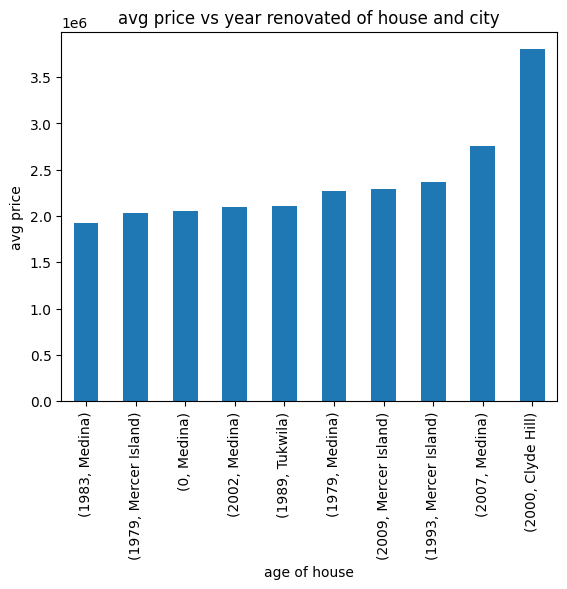

In [23]:
df.groupby(['yr_renovated','city'])['price'].mean().sort_values().tail(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs year renovated of house and city");

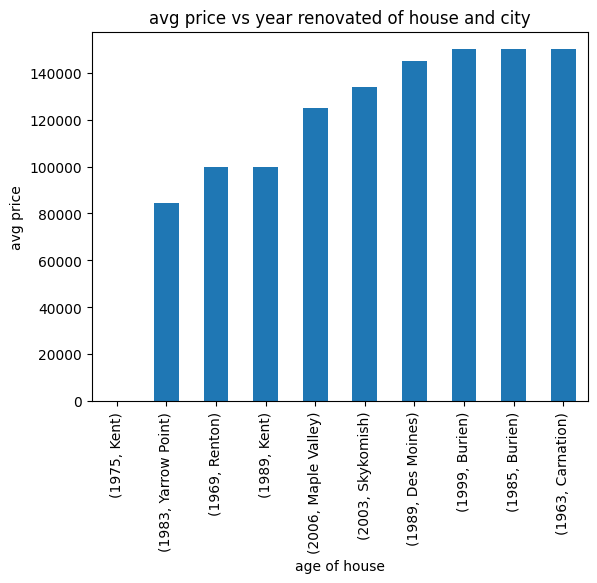

In [24]:
df.groupby(['yr_renovated','city'])['price'].mean().sort_values().head(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs year renovated of house and city");

In [25]:
df.drop(columns=["view"],inplace=True)

sqft_living quantifies the interior living space of a property, sqft_lot measures the total land area, and sqft_basement provides information about the size of the basement area. These metrics collectively offer insights into the size, layout, and potential of a property, helping buyers, sellers, and real estate professionals make informed decisions.

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   sqft_living    4600 non-null   int64  
 3   sqft_lot       4600 non-null   int64  
 4   sqft_basement  4600 non-null   int64  
 5   yr_built       4600 non-null   int64  
 6   yr_renovated   4600 non-null   int64  
 7   city           4600 non-null   int64  
 8   n_years        4600 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 323.6 KB


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X=df.drop(columns=['price'])
y=df['price']

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
print("train:",X_train.shape)
print("test:",X_test.shape)
print("train:",y_train.shape)
print("test:",y_test.shape)

train: (3680, 8)
test: (920, 8)
train: (3680,)
test: (920,)


In [32]:
pipeline = make_pipeline(StandardScaler(),LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

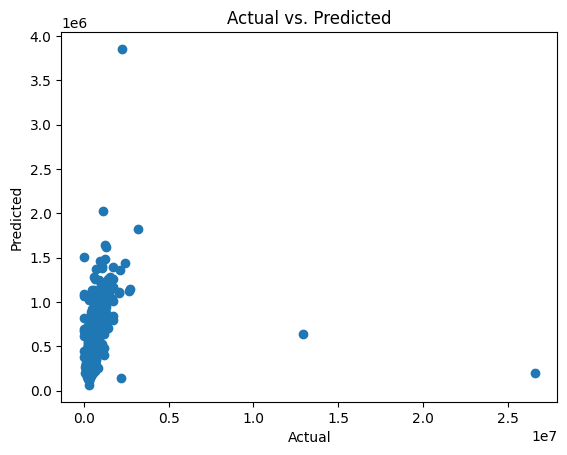

In [33]:
y_pred = pipeline.predict(X_test)

# Step 7: Plot the model
# You can use matplotlib as before

# Example: Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()


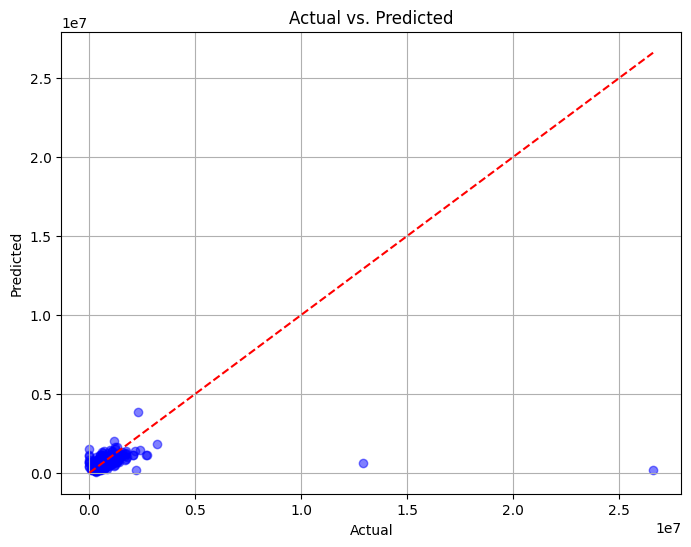

In [34]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 989302553373.5791
Mean Absolute Error: 214635.88266623308
R-squared: 0.029949400721260955
